#### Global Power Plant Database
##### Problem Statement:

##### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
##### Key attributes of the database

The database includes the following indicators:

-    `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
-    `country_long` (text): longer form of the country designation
-   `name` (text): name or title of the power plant, generally in Romanized form
-    `gppd_idnr` (text): 10 or 12 character identifier for the power plant
-    `capacity_mw` (number): electrical generating capacity in megawatts
-    `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
-    `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
-    `primary_fuel` (text): energy source used in primary electricity generation or export
-    `other_fuel1` (text): energy source used in electricity generation or export
-    `other_fuel2` (text): energy source used in electricity generation or export
-    `other_fuel3` (text): energy source used in electricity generation or export
-     `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
-    `owner` (text): majority shareholder of the power plant, generally in Romanized form
-    `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
-    `url` (text): web document corresponding to the `source` field
-    `geolocation_source` (text): attribution for geolocation information
-    `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
-    `year_of_capacity_data` (number): year the capacity information was reported
-    `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
-    `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
-    `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
-    `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
-    `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
-    `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
-    `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
-    `generation_data_source` (text): attribution for the reported generation information
-    `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
-    `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
-    `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
-    `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
-    `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
-    `estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
-    `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
-    `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
-    `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
-    `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

##### Fuel Type Aggregation

 We define the "Fuel Type" attribute of our database based on common fuel categories. 

##### Prediction :   Make two prediction  1) Fuel Type   2) capacity_mw 

In [1]:
# Importing Necessory Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE


# Models:
#(for classification)
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

#(for Regression)
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb


#Matrics for evaluation:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_roc_curve,roc_auc_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
# READING THE DATASET
df=pd.read_csv("global-power-plant-database.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


- As we can see, this Global Power Plant dataset is containg 25 columns where the data contains a good blend of categorical, numerical and missing values.
- We need to predict the fuel type and capacity in megawatts depending upon different features.
- These 2 columns are the dependent variables 'primary_fuel' and 'capacity_mw'. Where Primary fuel is a categorical data so we need to do classification to get the prediction and as 'capacity_mw' is a continuous data, hence we need to do regression to get the prediction.

In [32]:
df.shape

(908, 25)

- There are 908 rows and 25 columns in the dataset.

In [33]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

- The 25 different columns are mentioned above. These columns are blend of nominal, numerical and continuous values.

In [34]:
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

- As we can see there are missing values in several columns, that we need to clean before model creation.

In [35]:
df.nunique()

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

- Different columns are containing different counts of categories like, country column is having only one category. The target variable, primary_fuel is having 8 categories , so it is a multiclass column that we will combine into binary class to get ROC_AUC curve.

In [36]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

- As we can see the dataset is mixture of nominal, continuous and categorical values.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

- As we can see, other than country ,country_long ,name ,gppd_idnr ,capacity_mw ,primary_fuel ,source ,url columns there are missing values in every columns.

In [38]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


- Only Capacity_mw column is having 908 count of values , other than that all the discrete as well as continuous value containing columns are having missing values.
- Difference of quartile 3 and maximum of longitude column is a little deviated maybe there is skewness in the column.
- other_fuel3 is containing only missing values. We need to remove this column before model creation.
- wepp_id is containing only missing values. We need to remove this column before model creation.
- year_of_capacity_data is containing same value through out the dataset. We need to remove this column before model creation.
- generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017, in these columns the mean value is lesser than standard deviation, that means the data is so much deviated. Outliers are present, Skewness is there, that we need to take care. These columns are also containing minimum value 0 that we need to replace before model creation.
- estimated_generation_gwh column is also having only missing values that we need to drop.

#### Data Analysis:

We will do Univariate Analysis to understand the distribution of continuous features and count of the categorical features. Then we will do Bivariate Analysis to understand relation between feature vs target and feature vs feature. After that we will do multivariate Analysis to check multicolinearity and correlation.

Let's do that:

#### Univariate Analysis:
before analysis we will take all the continuous and numerical data into single variable.

In [39]:
df_con_features=df[['latitude','longitude',
                    'generation_gwh_2013','generation_gwh_2014',
                    'generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]

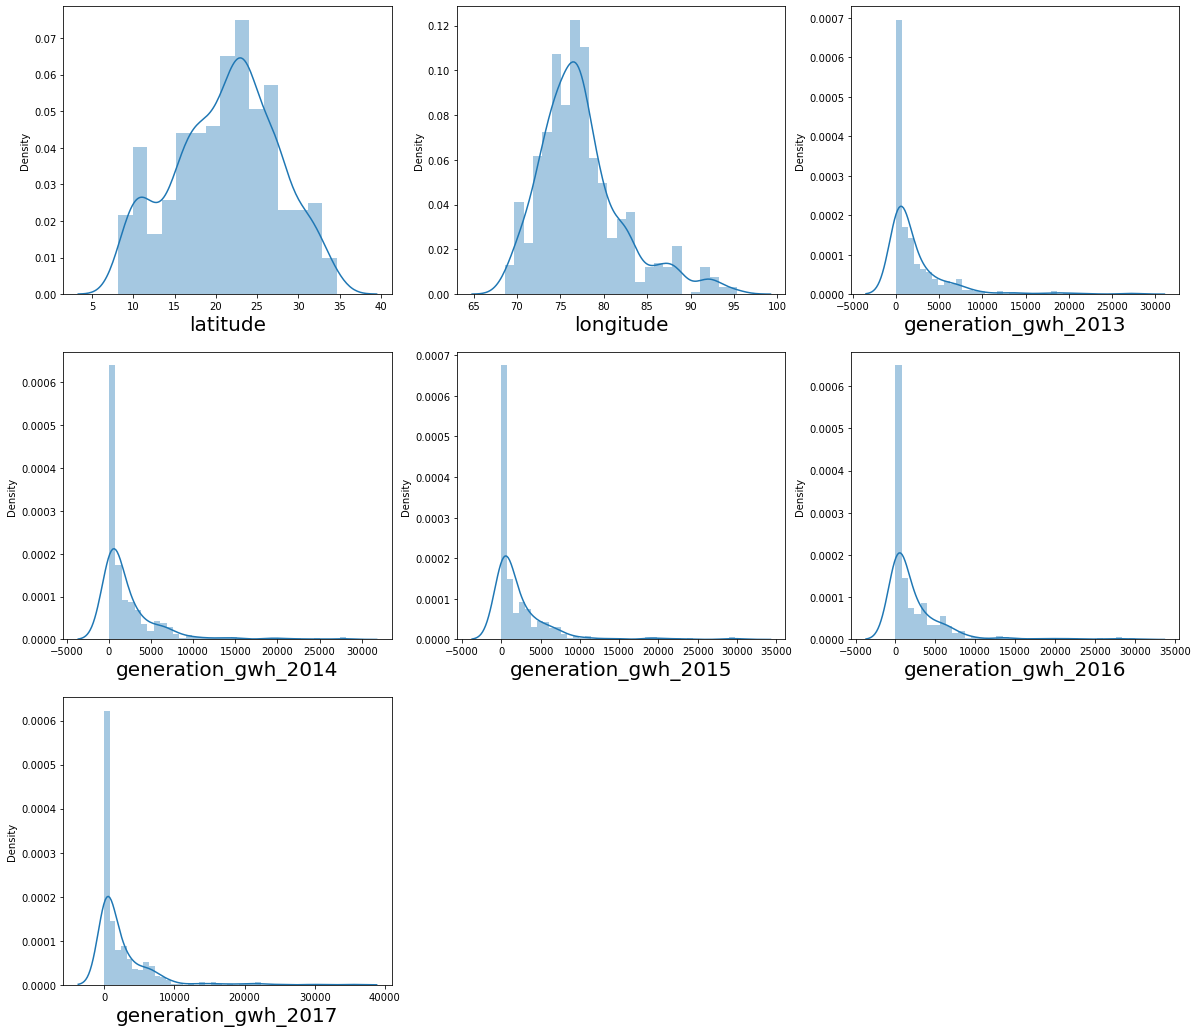

In [40]:
plt.figure(figsize=(20,18),facecolor='white')
plotnumber=1
for column in df_con_features:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df_con_features[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show() 

- latitude column is normally distributed.
- longitude data is little right skewed.
- generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 all these features are so much right skewed that we need to take care of.


- Now Let's visualize the dependent variable capacity_mw:

Minimum 0.0
Maximum 4760.0


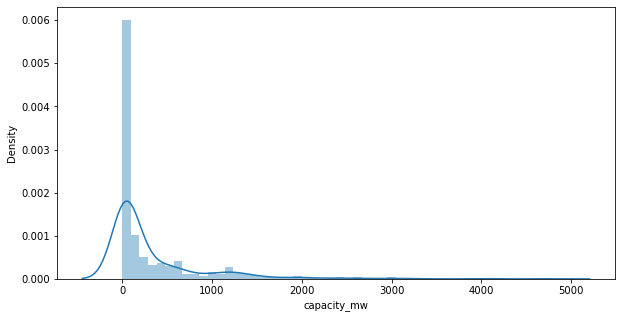

In [41]:
plt.figure(figsize=(10,5))
sns.distplot(df['capacity_mw'])
print('Minimum',df['capacity_mw'].min())
print('Maximum',df['capacity_mw'].max())

- As we can see the label is right skewed as the minimum value is 0 and maximum value is 4760. The gap is huge. 

Now let's visualize the other dependent variable Primary_fuel:

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

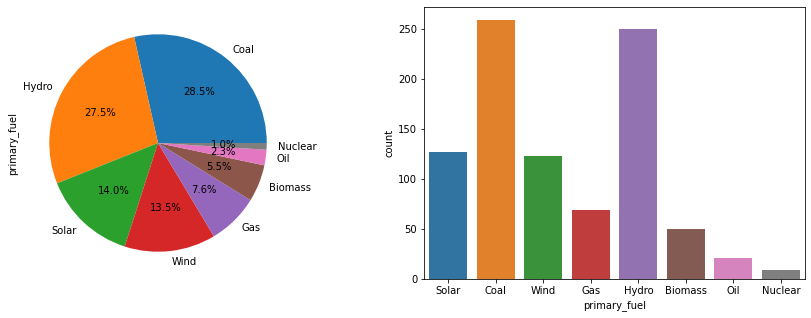

In [42]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['primary_fuel'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['primary_fuel'])
df['primary_fuel'].value_counts()

- As we can see, the target variable primary_fuel is having 8 categories, those are solar, coal, wind, gas, hydro, biomass, oil, nuclear where coal(28.5%) and hydro(27.5%) is the highest using primary fuel and neuclear is the least using (1%) primary fuel. Hence the target has multiclass that we need to convert into binary class for prediction.


Let's Visualize the feature columns as well:

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

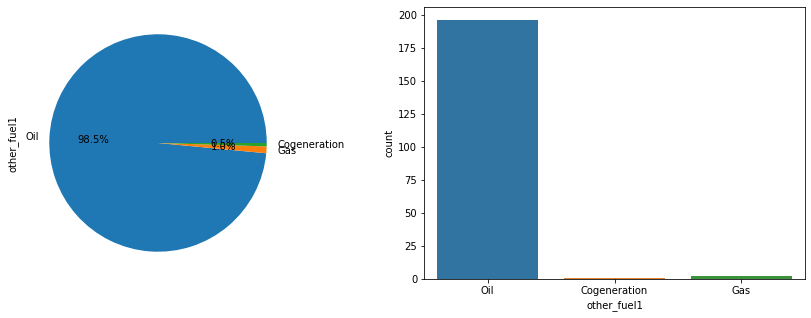

In [43]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['other_fuel1'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['other_fuel1'])
df['other_fuel1'].value_counts()

- other_fuel1 is having 3 categories - oil, Cogeneration and Gas. Out of which oil counts highest 196(98.5%)

Oil    1
Name: other_fuel2, dtype: int64

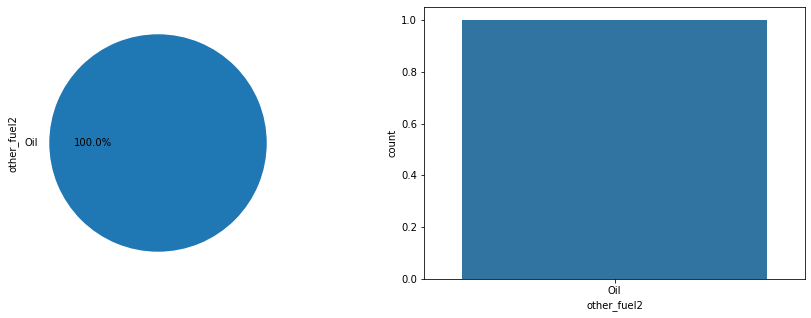

In [44]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['other_fuel2'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['other_fuel2'])
df['other_fuel2'].value_counts()

- Other fuel2 is containing single value and that is oil. As it is not containing any important data we need to drop it before model creation.

In [45]:
df['owner'].value_counts()

Acc Acc ltd                                     4
Jk Cement ltd                                   4
Sterling Agro Industries ltd.                   4
Karnataka Power Corporation Limited             3
Shri Ssk ltd                                    3
                                               ..
Bangalore Electricity Supply Company Limited    1
Jawahar Ssk ltd                                 1
Shri Hiranyakeshi ssk                           1
Electromech Maritech Private Limited            1
Aravali Infrapower Private Limited (AIPL)       1
Name: owner, Length: 280, dtype: int64

- Acc Acc ltd is highest share holder as they own shares of 4 plants.

In [46]:
df['source'].value_counts()

Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Videocon Industries Limited                    1
Real Estate e                                  1
Ambed K Sugar                                  1
IAEA                                           1
Varam Pvt ltd                                  1
Name: source, Length: 191, dtype: int64

- Central Electricity Authority is reporting the 520 data that is highest in count.

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

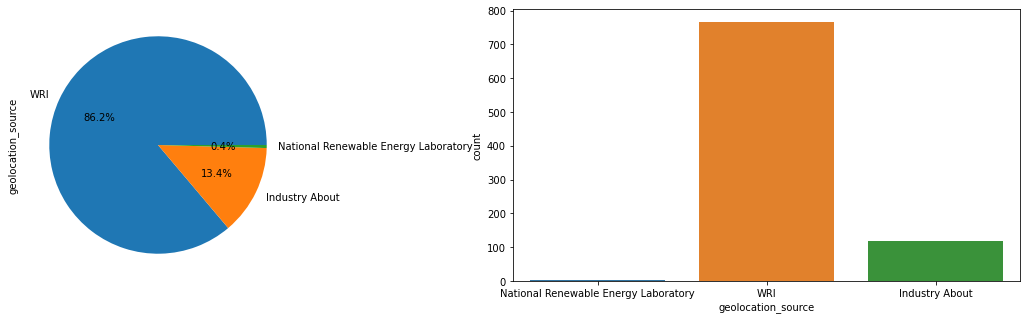

In [47]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
df['geolocation_source'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['geolocation_source'])
df['geolocation_source'].value_counts()

- geolocation_source is containing 3 different categories where WRI is having the highest data count 766 out of 908 plants. 

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

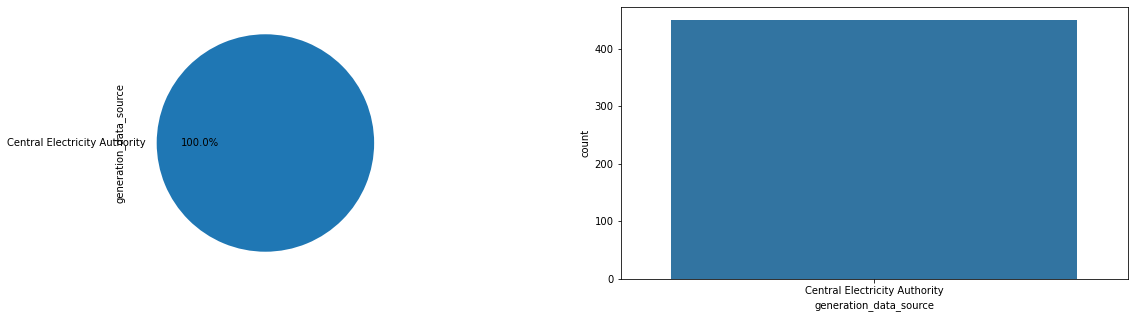

In [48]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
df['generation_data_source'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['generation_data_source'])
df['generation_data_source'].value_counts()

- 'generation_data_source' is having only one category that we will drop before model creation.


- After analyzing the data we can tell that some of the columns will not be useful as they have unquie ids, one single value data or unnecessory columns. We need to get rid of those before checking outliers.

In [50]:
# Lets drop unnessesory columns:
drop_columns=['country','name','gppd_idnr','country_long','other_fuel1','other_fuel2','other_fuel3','url','wepp_id','estimated_generation_gwh',
              'year_of_capacity_data']
df=df.drop(columns=drop_columns,axis=1)

- We have dropped 11 column, that we do not need to use.

In [51]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,WRI,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority


- As we can see those prior mentioned columns are dropped and not visible in the dataset.


#### Outlier Detection:

capacity_mw                AxesSubplot(0.125,0.71587;0.168478x0.16413)
latitude                AxesSubplot(0.327174,0.71587;0.168478x0.16413)
longitude               AxesSubplot(0.529348,0.71587;0.168478x0.16413)
commissioning_year      AxesSubplot(0.731522,0.71587;0.168478x0.16413)
generation_gwh_2013       AxesSubplot(0.125,0.518913;0.168478x0.16413)
generation_gwh_2014    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
generation_gwh_2015    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
generation_gwh_2016    AxesSubplot(0.731522,0.518913;0.168478x0.16413)
generation_gwh_2017       AxesSubplot(0.125,0.321957;0.168478x0.16413)
dtype: object

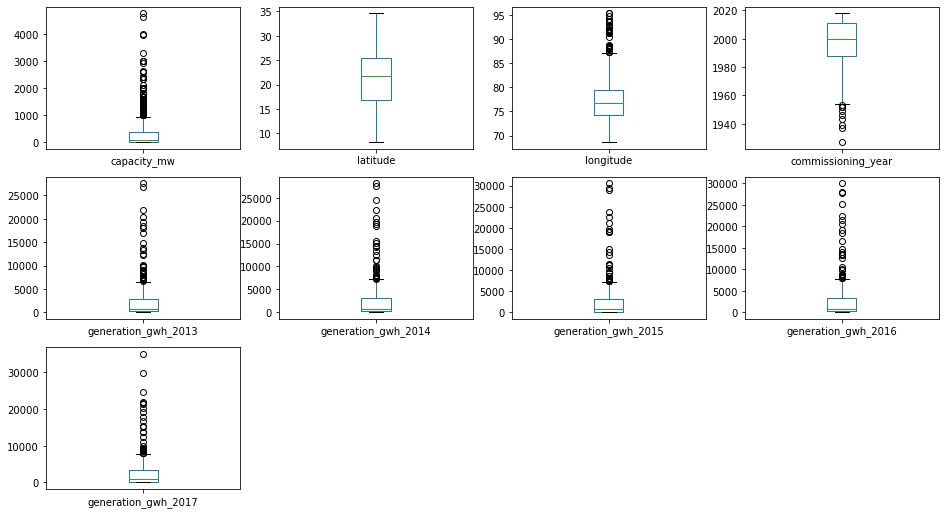

In [52]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(16,12))

- Except latitude column all the continuous columns are having outliers that we need to take care.


Now lets encode the categories of the target variable 'primary_fuel':

In [56]:
df['primary_fuel']= df['primary_fuel'].replace({'Hydro':1,'Coal':2,'Solar':3,'Wind':4,'Gas':5,'Biomass':6,'Oil':7,'Nuclear':8})

- We have encoded the target variable. Now we are going to check the relationship between target variable with features.

In [53]:
#let's divide the target variable primary_fuel and features
y = df['primary_fuel']
x = df.drop(columns=['primary_fuel'])
x

,capacity_mw,latitude,longitude,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,2.5,28.1839,73.2407,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2004.0,NaN,Central Electricity Authority,WRI,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,1800.0,21.9603,82.4091,2015.0,NaN,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,2016.0,NaN,Central Electricity Authority,WRI,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,3.0,12.8932,78.1654,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
905,25.5,15.2758,75.5811,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
906,80.0,24.3500,73.7477,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN


#### Bivariate analysis:

- Checking the relation between Primary fuel with continuous features first.

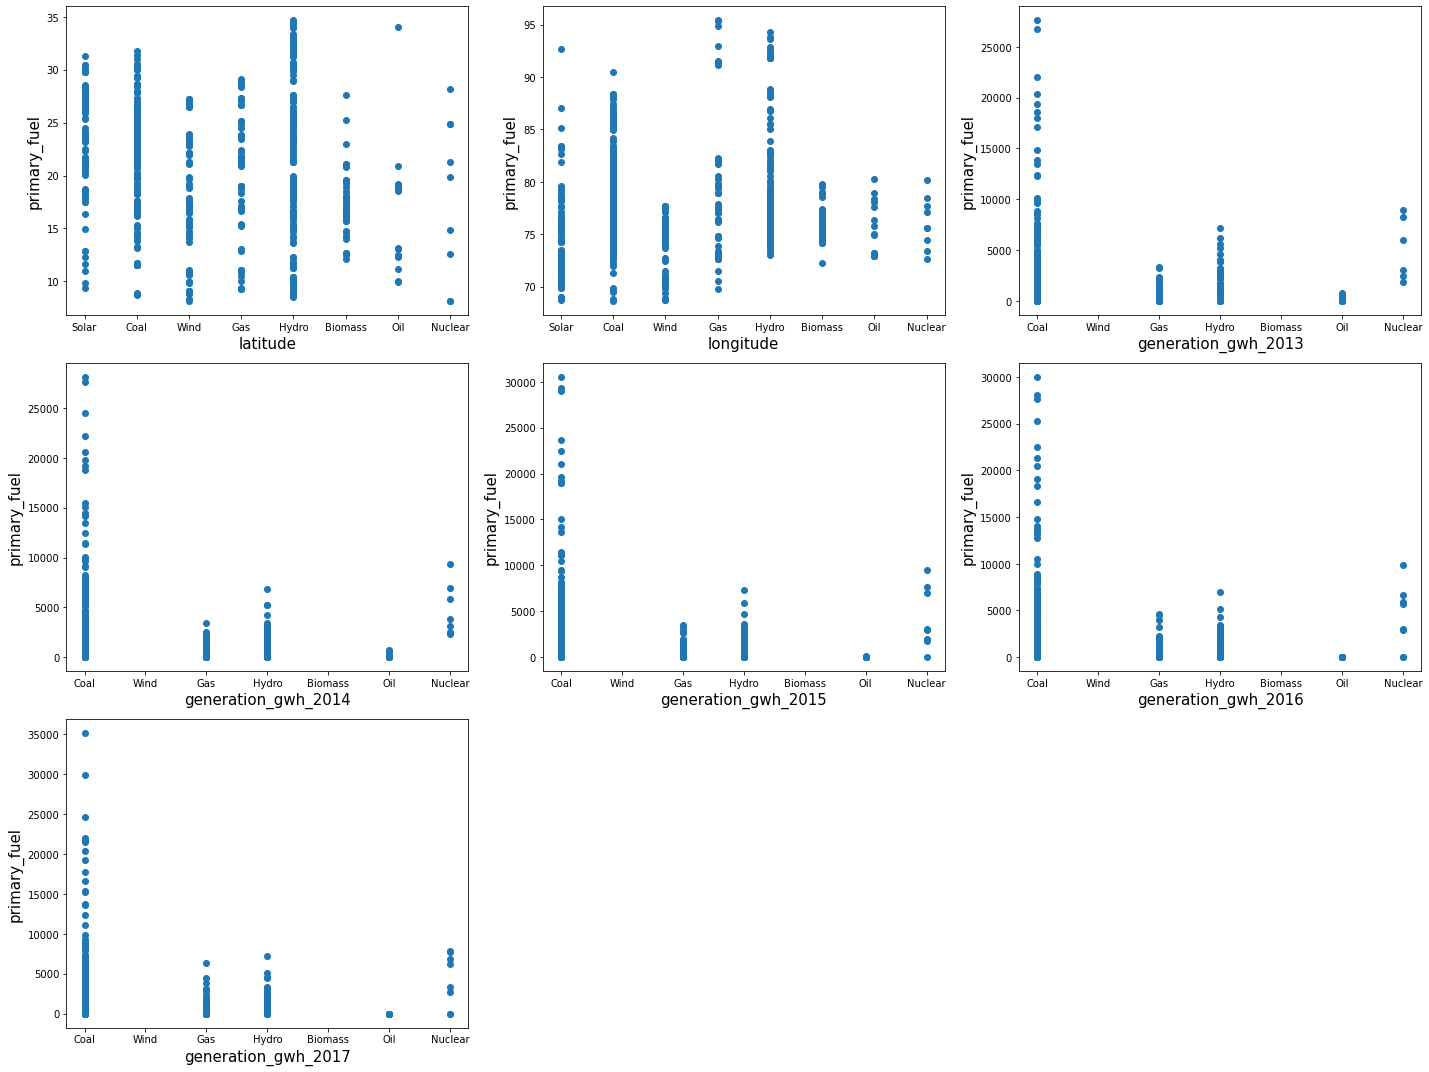

In [54]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in df_con_features:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(y,df_con_features[column])
        plt.xlabel(column,fontsize=15)
        plt.ylabel('primary_fuel',fontsize=15)
    plotnumber+=1
plt.tight_layout() 

- As we can see, latitude of Hydro and coal power plants are more than other types of power plants.
- longitude of Hydro and coal power plants are more than other types of power plants.
- From 2013 to 2017 electricity is generated highest by coal power plants and 2nd highest is by Hydro power plants.  


Now let's check the relation of target with categorical features.

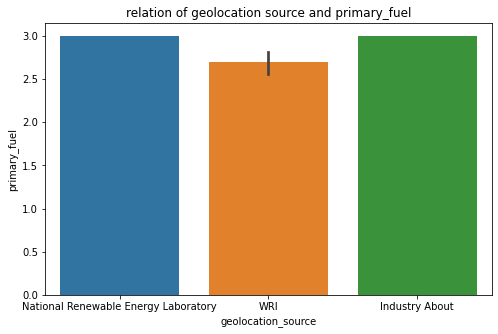

In [57]:
plt.figure(figsize=(8,5))
sns.barplot(x='geolocation_source',y='primary_fuel',data=df).set_title('relation of geolocation source and primary_fuel')
plt.show()

- national renewable energy laboratory and industry about both sources have given highest data regarding primary fuel.


Now let's divide the dataset into label (capacity_mw )and features to analyze the relations.

In [58]:
Y = df['capacity_mw']
X = df.drop(columns=['capacity_mw'])
X

,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,28.1839,73.2407,6,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,24.7663,74.6090,1,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,21.9038,69.3732,7,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,23.8712,91.3602,2,2004.0,NaN,Central Electricity Authority,WRI,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,21.9603,82.4091,1,2015.0,NaN,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,16.2949,77.3568,1,2016.0,NaN,Central Electricity Authority,WRI,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,12.8932,78.1654,6,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
905,15.2758,75.5811,7,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
906,24.3500,73.7477,1,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN


- the dataset is divided into label and features and as we can see for regression problem we are keeping the primary fuel column as feature in the dataset.

Now let's visualize the relation of capacity_mw with continuous variable first.

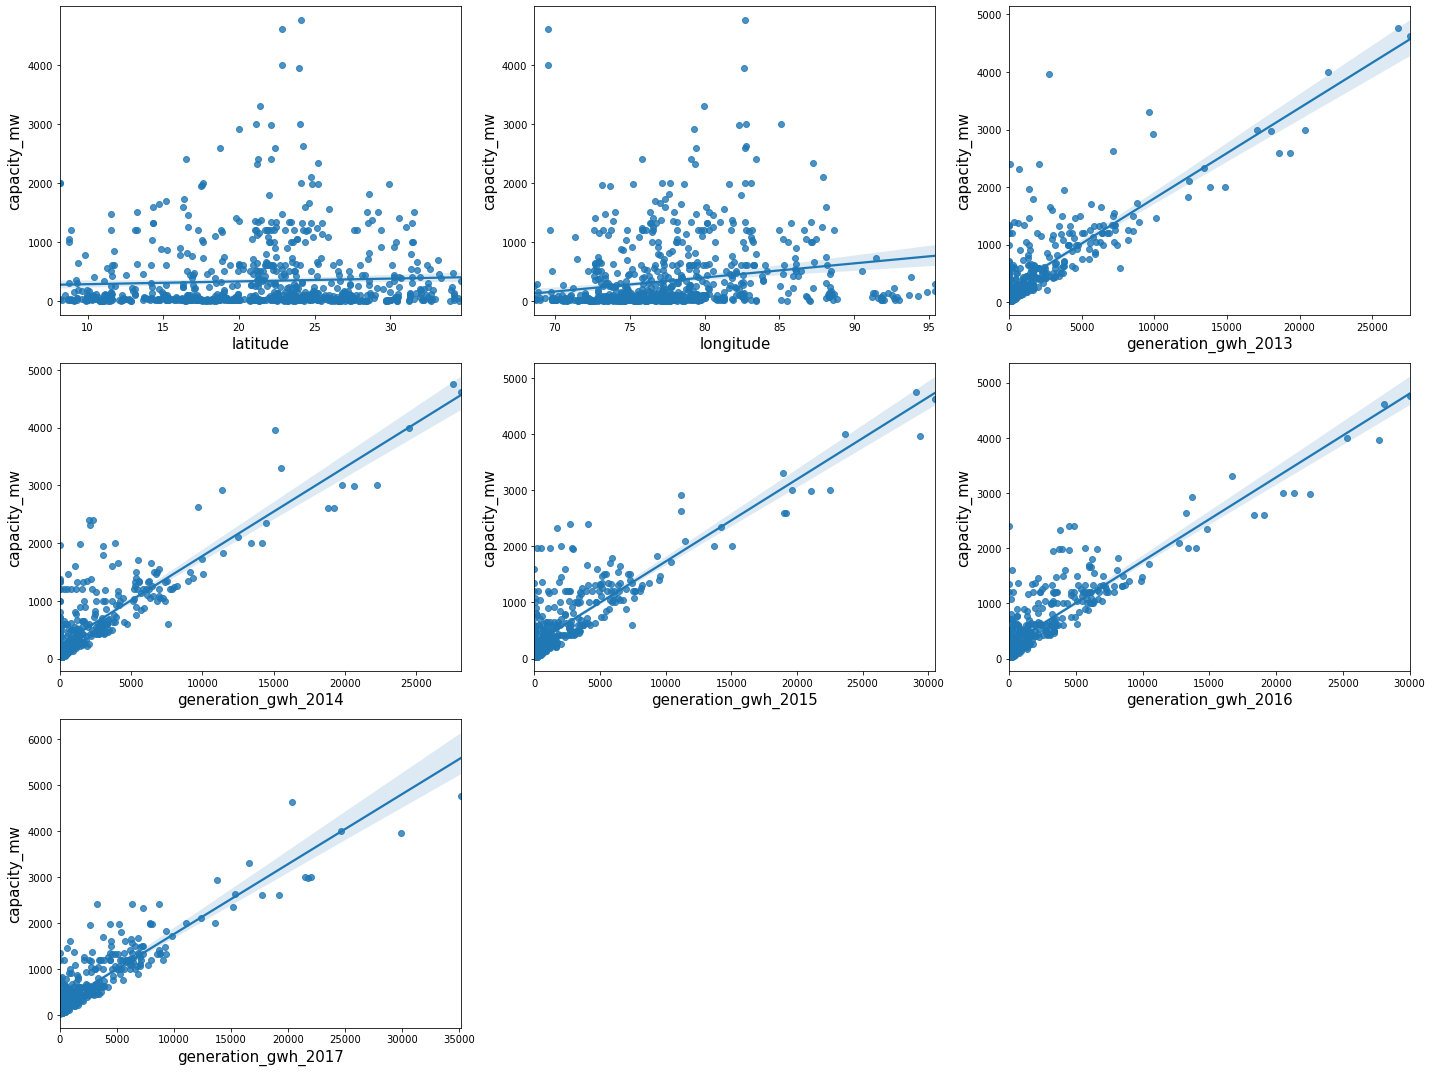

In [60]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in df_con_features:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        sns.regplot(df_con_features[column],Y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('capacity_mw',fontsize=15)
    plotnumber+=1
plt.tight_layout() 

- As we can see there is not much relation between capacity_mw with latitude and longitude. Other than that from 2013 to 2017 the generation of electricity is somewhat linearly correlated with capacity_mw.

#### Mutivariate Analysis:
Let's Check the correlations of feature vs feature and feature vs target:

In [58]:
corr = df.corr()
corr

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
capacity_mw,1.000000,0.050107,0.198377,-0.128211,0.294661,0.823513,0.850698,0.855834,0.881209,0.896785
latitude,0.050107,1.000000,0.031501,-0.233045,0.120944,0.050720,0.059826,0.048103,0.040832,0.039711
longitude,0.198377,0.031501,1.000000,-0.255884,0.114167,0.017461,0.013678,0.023087,0.051128,0.049320
primary_fuel,-0.128211,-0.233045,-0.255884,1.000000,0.203604,-0.005595,-0.008982,-0.008128,-0.011647,0.013977
commissioning_year,0.294661,0.120944,0.114167,0.203604,1.000000,0.137351,0.160896,0.171964,0.195301,0.193421
generation_gwh_2013,0.823513,0.050720,0.017461,-0.005595,0.137351,1.000000,0.968904,0.908396,0.894752,0.859459
generation_gwh_2014,0.850698,0.059826,0.013678,-0.008982,0.160896,0.968904,1.000000,0.961105,0.937091,0.912585
generation_gwh_2015,0.855834,0.048103,0.023087,-0.008128,0.171964,0.908396,0.961105,1.000000,0.974955,0.940274
generation_gwh_2016,0.881209,0.040832,0.051128,-0.011647,0.195301,0.894752,0.937091,0.974955,1.000000,0.972054
generation_gwh_2017,0.896785,0.039711,0.049320,0.013977,0.193421,0.859459,0.912585,0.940274,0.972054,1.000000


##### Plotting heatmap (correlation matrix)
Let's try to see if we can reduce the features using different techniques. Let's plot Heatmap to visualize and find the coefficient and multicolinearity.

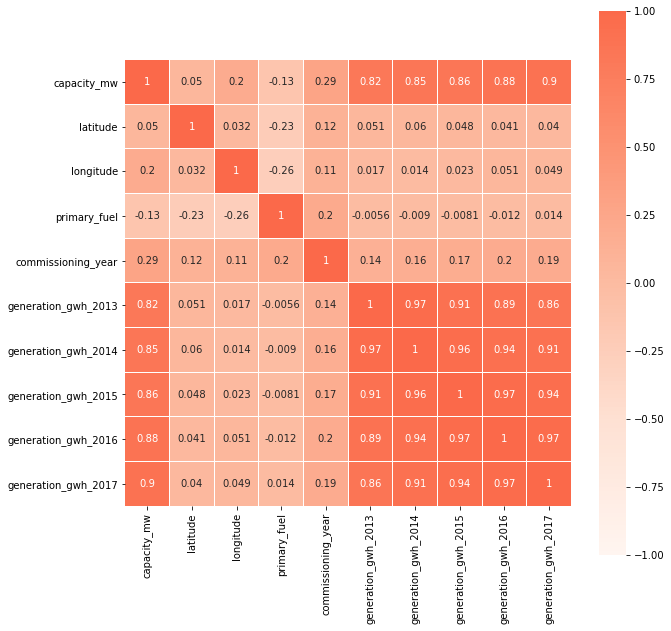

In [59]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,cmap='Reds',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show()

- As we can see, all the generation_gwh is correlated with capacity_mw and that will be good for our regression model.
- Least correlation between features important for Classification problem.
- there maybe correlation between generation gwh but we will not drop those, as those are correlated with the independent variable capasity_mw.


#### Data Cleaning:
Let's check the missing values first:

In [441]:
df.isna().sum()

capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     566
source                      0
geolocation_source         19
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

- There are so many missing values present in different features. We will fill those using mean or median depending upon requirements.

In [60]:
df['latitude'].fillna(df['latitude'].mean(),inplace=True)   #replacing missing value with mean for latitude column

In [61]:
df['longitude'].fillna(df['longitude'].median(),inplace=True)  #replacing missing values with median for longitude column

In [62]:
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0]) #replacing missing values of geolocation source by using mode

In [64]:
df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].median(),inplace=True) #replacing missing value with median for generation_gwh_2013 column

In [65]:
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median(),inplace=True) #replacing missing value with median for generation_gwh_2014 column

In [66]:
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median(),inplace=True) #replacing missing value with median for generation_gwh_2015 column

In [67]:
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median(),inplace=True) #replacing missing value with median for generation_gwh_2016 column

In [68]:
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median(),inplace=True) #replacing missing value with median for generation_gwh_2017 column

In [69]:
df['generation_data_source'] = df['generation_data_source'].fillna(df['generation_data_source'].mode()[0]) #replacing missing values of generation_data_source by using mode

- Now lets check is there any missing value present or not.

In [70]:
df.isna().sum()

capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
commissioning_year        380
owner                     566
source                      0
geolocation_source          0
generation_gwh_2013         0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_data_source      0
dtype: int64

- As we can see there are missing value present in those unnecessory columns. So we are going to drop those column.

In [71]:
drop_column=['commissioning_year','owner']  #DROP ALERT
df=df.drop(columns=drop_column,axis=1)

In [72]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,2.5,28.1839,73.2407,3,National Renewable Energy Laboratory,National Renewable Energy Laboratory,797.063475,805.760000,701.02725,716.728350,807.601700,Central Electricity Authority
1,98.0,24.7663,74.6090,2,Ultratech Cement ltd,WRI,797.063475,805.760000,701.02725,716.728350,807.601700,Central Electricity Authority
2,39.2,21.9038,69.3732,4,CDM,WRI,797.063475,805.760000,701.02725,716.728350,807.601700,Central Electricity Authority
3,135.0,23.8712,91.3602,5,Central Electricity Authority,WRI,631.777928,617.789264,843.74700,886.004428,663.774500,Central Electricity Authority
4,1800.0,21.9603,82.4091,2,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736,Central Electricity Authority


- As we can see there is no missing value present in the dataset.


#### Encoder:
Now let's encode the nominal and categorical data into numerical data for using in model. For that we are using ordinal encoder.

In [73]:
en=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=en.fit_transform(df[i].values.reshape(-1,1))
df.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,2.5,28.1839,73.2407,3,109.0,1.0,797.063475,805.760000,701.02725,716.728350,807.601700,0.0
1,98.0,24.7663,74.6090,2,174.0,2.0,797.063475,805.760000,701.02725,716.728350,807.601700,0.0
2,39.2,21.9038,69.3732,4,21.0,2.0,797.063475,805.760000,701.02725,716.728350,807.601700,0.0
3,135.0,23.8712,91.3602,5,22.0,2.0,631.777928,617.789264,843.74700,886.004428,663.774500,0.0
4,1800.0,21.9603,82.4091,2,22.0,2.0,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736,0.0


- As we can see all the nominal data is encoded into numerical data.

In [74]:
df.dtypes

capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel                int64
source                    float64
geolocation_source        float64
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_data_source    float64
dtype: object

- As we can see all the datatypes of different columns are either float type or integer type.

Now we need to drop one more unnecessory data that is, generation_data_source as it is containing only 0.0 values in it.

In [75]:
df=df.drop(columns='generation_data_source',axis=1)

- Now it's time to check the skewness and remove those skewness.

#### Skewness Removal:

In [76]:
df.skew()

capacity_mw            3.193257
latitude              -0.147391
longitude              1.150963
primary_fuel           0.933977
source                 1.829145
geolocation_source    -2.161710
generation_gwh_2013    5.535740
generation_gwh_2014    5.325540
generation_gwh_2015    5.565770
generation_gwh_2016    5.278233
generation_gwh_2017    5.312975
dtype: float64

- Most of the features are having skewness that we need to get rid of.

In [77]:
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.410936,2.758811,43.823789,1.733480,1434.383254,1518.830440,1502.838018,1552.807503,1648.790766
std,580.221767,6.088110,4.783873,1.698361,44.624092,0.676835,2575.982982,2783.474774,2985.277178,3006.880849,3047.577626
min,0.000000,8.168900,68.644700,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,1.000000,22.000000,2.000000,797.063475,805.760000,701.027250,716.728350,807.601700
50%,60.000000,21.278850,76.719250,2.000000,22.000000,2.000000,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.183775,79.211600,4.000000,29.250000,2.000000,797.063475,805.760000,701.027250,716.728350,807.601700
max,4760.000000,34.649000,95.408000,8.000000,190.000000,2.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


- By analyzing the statistics of the dataset we can see the abnormalities in the dataset that we need to take care. Let's remove the skewness by using Power Transformer.

In [78]:
# We are taking all the skewed continuous features into single variable
features=['longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']

In [79]:
scaler=PowerTransformer(method='yeo-johnson')  #using yeo-johnson method

In [80]:
df[features]=scaler.fit_transform(df[features].values) #scaling the features

In [81]:
df[features]

,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,-0.945660,-0.046712,-0.045486,-0.053637,-0.054984,-0.038673
1,-0.534583,-0.046712,-0.045486,-0.053637,-0.054984,-0.038673
2,-2.390876,-0.046712,-0.045486,-0.053637,-0.054984,-0.038673
3,2.181487,-0.234814,-0.246450,0.081323,0.097738,-0.175277
4,1.132342,0.615682,1.151206,1.837256,1.845609,1.623273
...,...,...,...,...,...,...
903,0.168021,-0.046712,-0.045486,-2.561939,-0.764834,0.010848
904,0.347894,-0.046712,-0.045486,-0.053637,-0.054984,-0.038673
905,-0.268590,-0.046712,-0.045486,-0.053637,-0.054984,-0.038673
906,-0.788052,-0.046712,-0.045486,-0.053637,-0.054984,-0.038673


- As we can see the data is scaled and skewness free.

In [464]:
df.skew()

capacity_mw            3.193257
latitude              -0.147391
longitude              0.002567
primary_fuel           1.816913
source                 1.829145
geolocation_source    -2.161710
generation_gwh_2013    0.313991
generation_gwh_2014    0.286606
generation_gwh_2015    0.220431
generation_gwh_2016    0.201832
generation_gwh_2017    0.194047
dtype: float64

- The dataset is looking better than before. 

#### Now this dataset is ready for Classification and regression. We will use this dataset in our regression problem. But as we need to show the ROC AUC curve we need to convert the multiclass target variable primary fuel into binary class. and that we will use only in classification problem. Let's do that.

#### We are combining the 8 categories into two categories fuel1 and fuel2. fuel1 is having primary fuels those produde more like hydro, coal, solar and wind whereas fuel2 is having fuel those produce less like gas, biomass, oil, nuclear.

In [24]:
bins=(0, 4, 8)
group_names=['fuel1', 'fuel2']
df['primary_fuel']=pd.cut(df['primary_fuel'], bins=bins, labels =group_names)

- After the conversion we have to encode the column into numbers. For that we are using Label Encoder.

In [25]:
l = LabelEncoder()
l_s = ['primary_fuel']
for i in l_s:
    df[i] = l.fit_transform(df[i])

- As the target is encoded we are going to predict the fuel type by using classification models. Now it's time to divide the dataset into target(y) and features(x) let's do that:

In [339]:
y=df['primary_fuel']
x=df.drop(columns=['primary_fuel'])

- After separation of target and features we need to balance the imbalanced target. let's do it.

In [340]:
sm=SMOTE()
x,y = sm.fit_resample(x,y)

In [341]:
y.value_counts()

1    759
0    759
Name: primary_fuel, dtype: int64

- As we can see now the y variable (target) is balanced. Now let's scale the data and create the models.

#### Standardization:

In [471]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

##### Hold Out Method:

Model will be built on Hold Out method(75/25 training and test split) to gauge how well the classifier is working.

In [378]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=100)

#### Model Creation:
Now let's see the Accuracy scores according to five models we have used below. we are using models like,
1. Logistic Regression,
2. Decision Tree Classifier,
3. Random Forest Classifier,
4. K-Nearest Neighbors Classifier,
5. Gradient Boosting Classifier.

#### 1. Logistic Regression:

In [379]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_train)
lr_clf_report = pd.DataFrame(classification_report(y_train,lr_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,lr_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,lr_pred)}\n")
      


=======================Train Result===========================
Accuracy score:73.37%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.715210    0.755769  0.733743     0.735490      0.735490
recall       0.776801    0.690685  0.733743     0.733743      0.733743
f1-score     0.744735    0.721763  0.733743     0.733249      0.733249
support    569.000000  569.000000  0.733743  1138.000000   1138.000000
________________________________________________________________
 Confusion Matrix:
[[442 127]
 [176 393]]



In [380]:
lr_pred=lr.predict(x_test)
lr_clf_report = pd.DataFrame(classification_report(y_test,lr_pred,output_dict=True))
print("\n=======================Test Result of LR ===========================")
print(f"Accuracy score:{accuracy_score(y_test,lr_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,lr_pred)}\n")     


=======================Test Result of LR ===========================
Accuracy score:73.16%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.696429    0.782051  0.731579    0.739240      0.739240
recall       0.821053    0.642105  0.731579    0.731579      0.731579
f1-score     0.753623    0.705202  0.731579    0.729413      0.729413
support    190.000000  190.000000  0.731579  380.000000    380.000000
________________________________________________________________
 Confusion Matrix:
[[156  34]
 [ 68 122]]



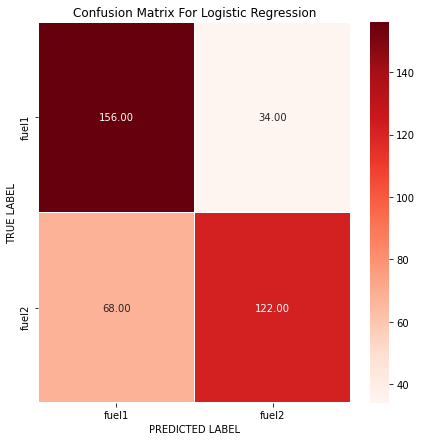

In [381]:
cm = confusion_matrix(y_test,lr_pred)

x_axis_labels=['fuel1','fuel2']
y_axis_labels=['fuel1','fuel2']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Logistic Regression')

plt.show()

In [382]:
#checking ROC_AUC Score of Logistic Regression:

roc_auc_score(y_test,lr.predict(x_test))

0.7315789473684211

#### 2. Decision Tree Classifier :

In [383]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_train)
dt_clf_report = pd.DataFrame(classification_report(y_train,dt_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,dt_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,dt_pred)}\n")
      


=======================Train Result===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    569.0  569.0       1.0     1138.0        1138.0
________________________________________________________________
 Confusion Matrix:
[[569   0]
 [  0 569]]



In [384]:
dt_pred=dt.predict(x_test)
dt_clf_report = pd.DataFrame(classification_report(y_test,dt_pred,output_dict=True))
print("\n=======================Test Result of dt_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,dt_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,dt_pred)}\n")  


=======================Test Result of dt_clf===========================
Accuracy score:85.53%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.877095    0.835821  0.855263    0.856458      0.856458
recall       0.826316    0.884211  0.855263    0.855263      0.855263
f1-score     0.850949    0.859335  0.855263    0.855142      0.855142
support    190.000000  190.000000  0.855263  380.000000    380.000000
________________________________________________________________
 Confusion Matrix:
[[157  33]
 [ 22 168]]



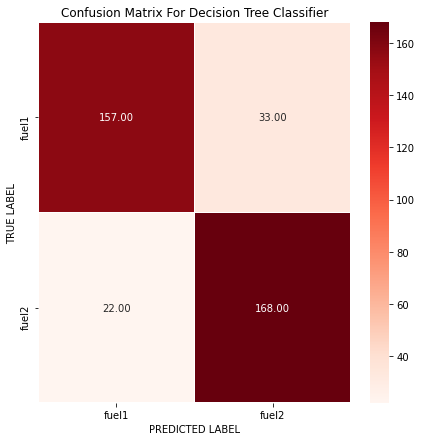

In [385]:
cm = confusion_matrix(y_test,dt_pred)

x_axis_labels=['fuel1','fuel2']
y_axis_labels=['fuel1','fuel2']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Decision Tree Classifier')

plt.show()

In [386]:
#ROC_AUC Score of Decision Tree Classifier:
roc_auc_score(y_test,dt.predict(x_test))

0.855263157894737

#### 3. Random Forest Classifier :

In [412]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_train)
rf_clf_report = pd.DataFrame(classification_report(y_train,rf_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,rf_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,rf_pred)}\n")


=======================Train Result===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    569.0  569.0       1.0     1138.0        1138.0
________________________________________________________________
 Confusion Matrix:
[[569   0]
 [  0 569]]



In [413]:
rf_pred=rf.predict(x_test)
rf_clf_report = pd.DataFrame(classification_report(y_test,rf_pred,output_dict=True))
print("\n=======================Test Result of RF_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,rf_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,rf_pred)}\n")   


=======================Test Result of RF_clf===========================
Accuracy score:92.37%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.925926    0.921466  0.923684    0.923696      0.923696
recall       0.921053    0.926316  0.923684    0.923684      0.923684
f1-score     0.923483    0.923885  0.923684    0.923684      0.923684
support    190.000000  190.000000  0.923684  380.000000    380.000000
________________________________________________________________
 Confusion Matrix:
[[175  15]
 [ 14 176]]



Text(0.5, 1.0, 'Confusion Matrix For Random Forest Classifier')

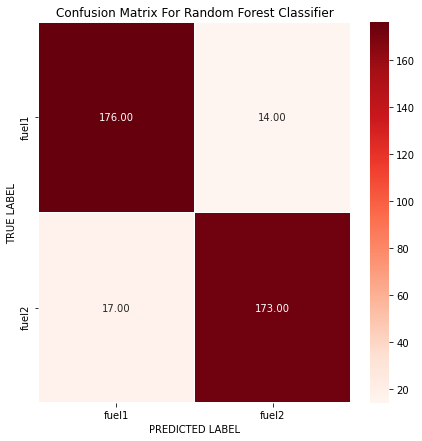

In [389]:
cm = confusion_matrix(y_test,rf_pred)

x_axis_labels=['fuel1','fuel2']
y_axis_labels=['fuel1','fuel2']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Random Forest Classifier')

In [390]:
#ROC_AOC Score of Random Forest Classifier:

roc_auc_score(y_test,rf.predict(x_test))

0.9184210526315789

#### 4. K-Neighbors Classifier :

In [391]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
kn_pred = kn.predict(x_train)
kn_clf_report = pd.DataFrame(classification_report(y_train,kn_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,kn_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,kn_pred)}\n")


=======================Train Result===========================
Accuracy score:93.23%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.973077    0.898058  0.932337     0.935568      0.935568
recall       0.889279    0.975395  0.932337     0.932337      0.932337
f1-score     0.929293    0.935131  0.932337     0.932212      0.932212
support    569.000000  569.000000  0.932337  1138.000000   1138.000000
________________________________________________________________
 Confusion Matrix:
[[506  63]
 [ 14 555]]



In [392]:
kn_pred=kn.predict(x_test)
kn_clf_report = pd.DataFrame(classification_report(y_test,kn_pred,output_dict=True))
print("\n=======================Test Result of KNN_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,kn_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,kn_pred)}\n")      
      


=======================Test Result of KNN_clf===========================
Accuracy score:86.84%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.932099    0.821101  0.868421    0.876600      0.876600
recall       0.794737    0.942105  0.868421    0.868421      0.868421
f1-score     0.857955    0.877451  0.868421    0.867703      0.867703
support    190.000000  190.000000  0.868421  380.000000    380.000000
________________________________________________________________
 Confusion Matrix:
[[151  39]
 [ 11 179]]



Text(0.5, 1.0, 'Confusion Matrix For K-Nearest Neighbor Classifier')

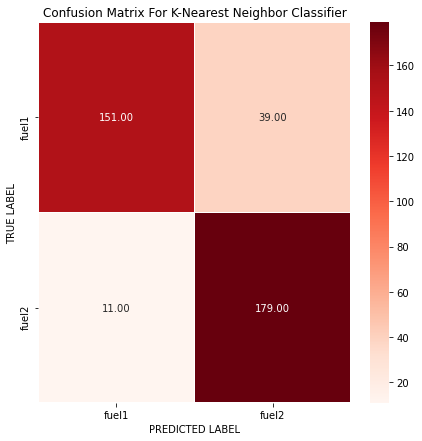

In [393]:
cm = confusion_matrix(y_test,kn_pred)

x_axis_labels=['fuel1','fuel2']
y_axis_labels=['fuel1','fuel2']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For K-Nearest Neighbor Classifier')

In [394]:
#ROC_AUC Score of K-Nearest Kneibors Classifier:

roc_auc_score(y_test,kn.predict(x_test))

0.868421052631579

#### 5. Gradient Boosting Classifier:

In [395]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
pred=gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")


=======================Train Result===========================
Accuracy score:95.78%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.977982    0.939292  0.957821     0.958637      0.958637
recall       0.936731    0.978910  0.957821     0.957821      0.957821
f1-score     0.956912    0.958692  0.957821     0.957802      0.957802
support    569.000000  569.000000  0.957821  1138.000000   1138.000000
________________________________________________________________
 Confusion Matrix:
[[533  36]
 [ 12 557]]



In [396]:
pred=gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("\n=======================Test Result===========================")
print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n") 


=======================Test Result===========================
Accuracy score:91.05%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.919355    0.902062  0.910526    0.910708      0.910708
recall       0.900000    0.921053  0.910526    0.910526      0.910526
f1-score     0.909574    0.911458  0.910526    0.910516      0.910516
support    190.000000  190.000000  0.910526  380.000000    380.000000
________________________________________________________________
 Confusion Matrix:
[[171  19]
 [ 15 175]]



Text(0.5, 1.0, 'Confusion Matrix Of Gradient Boosting Classifier')

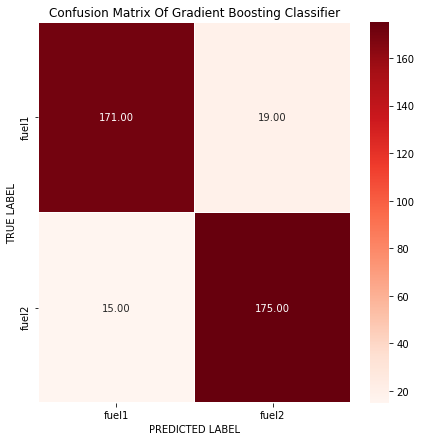

In [397]:
cm = confusion_matrix(y_test,pred)

x_axis_labels=['fuel1','fuel2']
y_axis_labels=['fuel1','fuel2']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix Of Gradient Boosting Classifier')

In [398]:
#ROC_AUC Score of Gradient Boosting Classifier:
roc_auc_score(y_test,gbdt_clf.predict(x_test))

0.9105263157894736

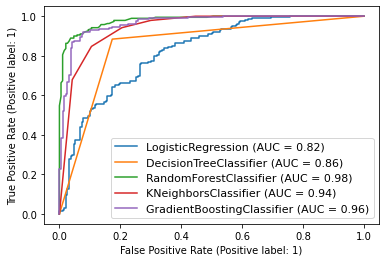

In [399]:
# Let's check ROC_AUC curve for fitted models:

disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbdt_clf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

#### Observation: 
We have seen that Random Forest Classifier has given the best accuracy of 91% regarding Fuel type prediction. And it's false positive number is also less (15). now let's check the cross validation scores of the models.



####    Cross validation :

   Cross validation is widely used technique to evaluate the performance of Machine Learning Models. Cross Validation divides the data into parts, where one set is used for traning and other is used for testing purpose. And by applying CV, we can understand if our model is overfitting on training data or not.


In [370]:
#Checking Cross Validation score for Logistic Regression:
print(f" CV Score of LR:{cross_val_score(lr,x,y,cv=5).mean()*100:.2f}%")

 CV Score of LR:72.92%


In [407]:
#Checking Cross Validation score of Decision Tree Classifier:
print(f"CV Score of DT:{cross_val_score(dt,x,y,cv=5).mean()*100:.2f}%")

CV Score of DT:88.67%


In [403]:
#Checking Cross Validation
print(f"CV Score of RF:{cross_val_score(rf,x,y,cv=5).mean()*100:.2f}%")

CV Score of RF:91.57%


In [373]:
# Checking Cross Validation Score of KNN:
print(f"CV Score of KNN:{cross_val_score(kn,x,y,cv=5).mean()*100:.2f}%")

CV Score of KNN:86.63%


In [374]:
#Checking Cross Validation Score of SVC:
print(f"CV Score of Gradient Boosting Classifier:{cross_val_score(gbdt_clf,x,y,cv=5).mean()*100:.2f}%")

CV Score of Gradient Boosting Classifier:88.80%


Now let's check the difference between Accuracy Score and Cross Validation Score to select the best model from the 5 models:

- Diffrence between Accuracy score and Cross Validation Score of 5 different models :
- LR = 73.16-72.92 = 0.25 
- DT = 85.53-88.67 = -3.14
- Rf = 92.37-91.57 = 0.8 
- KNN = 86.84-86.63 = 0.21
- Gbdt_clf = 91.05-88.80 = 2,25

So, as the accuracy score of random forest classifier is almost 93% and  as the difference of Accuracy Score and CV of Random Forest Classifier is very less but not least. But we are going to do hyperparameter tuning of RFC because the False positive number is the least for rfc. Hence, it's the best Model. Let's do Hyperparameter Tuning of RFC.

#### Hyperparameter Tuning:

Now we will use Grid Search Technique to tune the hyperparameter of Random Forest Classifier. After getting the best parameters we can use those with the model to obtain best accuracy.

In [408]:
rf = RandomForestClassifier()
params={'n_estimators':[12,13,15,17],
       'criterion':['entropy','gini'],
       'max_depth':[10,13,15,17],
       'min_samples_split':[10,12,11,13],
       'min_samples_leaf':[4,5,6,8]}

grd= GridSearchCV(rf,param_grid=params)
grd.fit(x_train,y_train)
print('best_params=> ',grd.best_params_)

rfc=grd.best_estimator_ #reinstantiating with best params
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

rfc_conf_mat = confusion_matrix(y_test,y_pred)
print('con_mat=> ','\n',rfc_conf_mat)
print('Accuracy of rf After Hyperparameter Tuning==> ',accuracy_score(y_test,y_pred)*100)

best_params=>  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 13}
con_mat=>  
 [[169  21]
 [ 15 175]]
Accuracy of rf After Hyperparameter Tuning==>  90.52631578947368


#### Observation:


After tuning with best parameters of Random forest classifier, it does not increase the accuracy (93%). Let's check the classification report for that.


In [409]:
Report = classification_report(y_test,y_pred)
print(Report)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       190
           1       0.89      0.92      0.91       190

    accuracy                           0.91       380
   macro avg       0.91      0.91      0.91       380
weighted avg       0.91      0.91      0.91       380



- The Classification report is showing less accuracy after Hyperparameter tuning. Hence we will save the prior RFC model as it's accuracy is best.

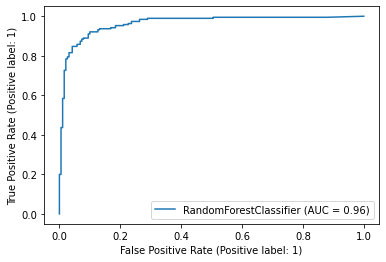

In [410]:
disp = plot_roc_curve(rfc,x_test,y_test)

- As we can conclude, Random Forest Classifier is the best model as the density of area under curve is almost 96%.

Now let's save the best model.

In [414]:
# model prediction using RF
x_predict = list(rf.predict(x_test))
rf_fuel = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(rf_fuel))

      predicted_values  orignal_values
1494                 1               1
341                  0               0
733                  0               0
299                  0               0
1068                 1               1
...                ...             ...
508                  0               0
1356                 1               1
1002                 1               1
896                  0               0
1034                 0               1

[380 rows x 2 columns]


In [415]:
#import joblib
import joblib

joblib.dump(rfc,'rf_fuel_file.obj')

# SAVING THE MODEL

['rf_fuel_file.obj']

In [416]:
rf_from_joblib=joblib.load('rf_fuel_file.obj')
rf_from_joblib.predict(x_test)

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

#### Now it's time to predict the electrical generating capacity in megawatts, as capacity_mw is a continuous variable, this is a regression type of problem. 
Now first we will check the clean data, then we will divide the dataset into label and functions. Let's do it.

In [82]:
df.head()   #checking the clean dataset

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,-0.945660,3,109.0,1.0,-0.046712,-0.045486,-0.053637,-0.054984,-0.038673
1,98.0,24.7663,-0.534583,2,174.0,2.0,-0.046712,-0.045486,-0.053637,-0.054984,-0.038673
2,39.2,21.9038,-2.390876,4,21.0,2.0,-0.046712,-0.045486,-0.053637,-0.054984,-0.038673
3,135.0,23.8712,2.181487,5,22.0,2.0,-0.234814,-0.246450,0.081323,0.097738,-0.175277
4,1800.0,21.9603,1.132342,2,22.0,2.0,0.615682,1.151206,1.837256,1.845609,1.623273


- After checking the dataset now we will separate the label and functions Y and X respectively.

In [94]:
Y=df['capacity_mw']
X=df.drop(columns=['capacity_mw'])

- As separation done now let's do standardization because all the data are in different scales.


#### Standardization:

In [95]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

- Now all the independent variables are scaled it's time to train the model.


##### Hold Out Method:
Model will be built on Hold Out method ( 75/25 training and test split ) to gauge how well the Regressor is working.

In [96]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

### Model Creation:

Now we are going to build 5 different models. And let's check which one is giving us the best Accuray. Those models are:


1. KNeiborsRegressor
2. RandomForestRegressor
3. GradientBoostingRegressor
4. XGBRegressor
5. DecisionTreeRegressor


#### 1. KNeighbors Regressor:

In [180]:
#Model Training:
kn = KNeighborsRegressor()
kn.fit(X_train,Y_train)

KNeighborsRegressor()

In [181]:
#Model Prediction with trained data:
Y_knn_pred = kn.predict(X_train)

In [182]:
print("R Square Score of kn:",r2_score(Y_train,Y_knn_pred))

R Square Score of kn: 0.8831240281105915


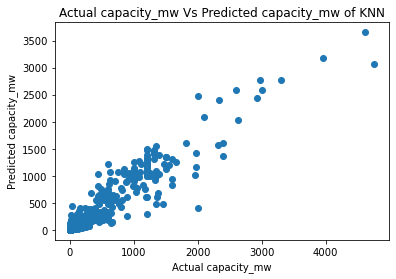

In [183]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(Y_train,Y_knn_pred)
plt.xlabel('Actual capacity_mw')
plt.ylabel('Predicted capacity_mw')
plt.title('Actual capacity_mw Vs Predicted capacity_mw of KNN')
plt.show()

In [184]:
# Predicting test data with model:
Y_test_kn_pred = kn.predict(X_test)

#### Evaluation of K-Neighbors Regressor:

In [185]:
kn_accuracy =r2_score(Y_test,Y_test_kn_pred)
print("R Square Score of K-Neighbors Regressor:",kn_accuracy)

R Square Score of K-Neighbors Regressor: 0.760606431420077


In [106]:
print ('mean absolute error of K-Neighbors Regressor is: ',mean_absolute_error(Y_test,Y_test_kn_pred))

mean absolute error of K-Neighbors Regressor is:  140.45028810572688


In [107]:
print ('mean squared error of kn is: ',mean_squared_error(Y_test,Y_test_kn_pred))

mean squared error of kn is:  77499.56803070715


In [108]:
print ('Root mean squared error of K-Neighbors Regressor is: ',np.sqrt(mean_squared_error(Y_test,Y_test_kn_pred)))

Root mean squared error of K-Neighbors Regressor is:  278.3874423006669


##### Scores of K-Neighbors Regressor:

1.    Accuracy of KNN- 0.760606431420077
2.    MAE of KNN - 140.45028810572688
3.    MSE of KNN - 77499.56803070715
4.    RMSE of KNN - 278.3874423006669


#### 2. Random Forest Regressor:

In [134]:
#Model Training:
rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train)

RandomForestRegressor()

In [114]:
#Model Prediction with trained data:
Y_rfr_pred = rfr.predict(X_train)

In [119]:
print("R Square Score of Random Forest Regressor:" ,r2_score(Y_train,Y_rfr_pred))

R Square Score of Random Forest Regressor: 0.9794452392362641


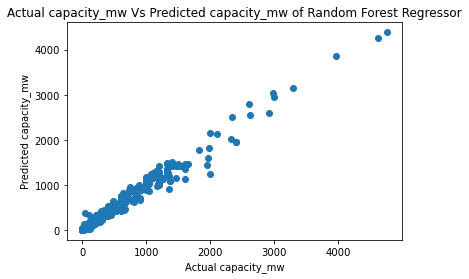

In [135]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(Y_train,Y_rfr_pred)
plt.xlabel('Actual capacity_mw')
plt.ylabel('Predicted capacity_mw')
plt.title('Actual capacity_mw Vs Predicted capacity_mw of Random Forest Regressor')
plt.show()

In [136]:
# Predicting test data with model:
Y_test_rfr_pred = rfr.predict(X_test)

#### Evaluation of Random Forest Regressor:

In [137]:
rfr_accuracy =r2_score(Y_test,Y_test_rfr_pred)
print("R Square Score of Random Forest Regressor:",rfr_accuracy)

R Square Score of Random Forest Regressor: 0.8666673163905376


In [138]:
print ('mean absolute error of Random Forest Regressor: ',mean_absolute_error(Y_test,Y_test_rfr_pred))

mean absolute error of Random Forest Regressor:  104.3055814491155


In [139]:
print ('mean squared error of Random Forest Regressor is: ',mean_squared_error(Y_test,Y_test_rfr_pred))

mean squared error of Random Forest Regressor is:  43164.17289488909


In [140]:
print ('Root mean squared error of Random Forest Regressor is: ',np.sqrt(mean_squared_error(Y_test,Y_test_rfr_pred)))

Root mean squared error of Random Forest Regressor is:  207.75989241162281


##### Scores of Random Forest Regressor:

1.    Accuracy of RFR : 0.8666673163905376
2.    MAE of RFR :  104.3055814491155
3.    MSE of RFR : 43164.17289488909
4.    RMSE of RFR : 207.75989241162281

    
#### 3. Gradient Boosting Regressor:    

In [141]:
# Model Training:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,Y_train)

GradientBoostingRegressor()

In [142]:
#Model Prediction with trained data:
Y_gbr_pred = gbr.predict(X_train)

In [143]:
print("R Square Score of Gradient Boosting Regressor: ",r2_score(Y_train,Y_gbr_pred))

R Square Score of Gradient Boosting Regressor:  0.9704060556513777


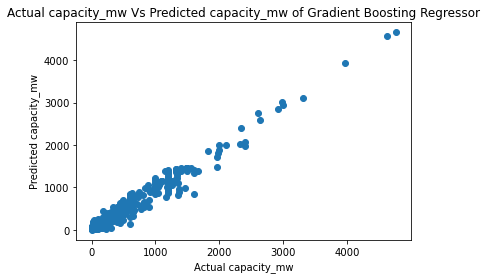

In [145]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(Y_train,Y_gbr_pred)
plt.xlabel('Actual capacity_mw')
plt.ylabel('Predicted capacity_mw')
plt.title('Actual capacity_mw Vs Predicted capacity_mw of Gradient Boosting Regressor')
plt.show()

In [150]:
# Predicting test data with model:
Y_test_gbr_pred = gbr.predict(X_test)

#### Evaluation of Gradient Boosting Regressor:

In [151]:
gbr_accuracy = r2_score(Y_test,Y_test_gbr_pred)
print("R Square Score of Gradient Boosting Regressor:",gbr_accuracy)
print('Accuracy of GBR :',gbr_accuracy*100)

R Square Score of Gradient Boosting Regressor: 0.8582640620201829
Accuracy of GBR : 85.82640620201829


In [152]:
print ('mean absolute error of Gradient Boosting Regressor: ',mean_absolute_error(Y_test,Y_test_gbr_pred))

mean absolute error of Gradient Boosting Regressor:  110.77114492445513


In [153]:
print ('mean squared error of Gradient Boosting Regressor is: ',mean_squared_error(Y_test,Y_test_gbr_pred))

mean squared error of Gradient Boosting Regressor is:  45884.582585165364


In [154]:
print ('Root mean squared error of Gradient Boosting Regressor: ',np.sqrt(mean_squared_error(Y_test,Y_test_gbr_pred)))

Root mean squared error of Gradient Boosting Regressor:  214.20686866943686


##### Scores of Gradient Boosting Regressor:

1.    Accuracy of GBR : 0.8582640620201829
2.    MAE of GBR : 110.77114492445513
3.    MSE of GBR : 45884.582585165364
4.    RMSE of GBR : 214.20686866943686


    
#### 4. XGBRegressor:    

In [155]:
xgb=xgb.XGBRegressor()
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [156]:
#Model Prediction with trained data:
Y_xgb_pred = xgb.predict(X_train)

In [157]:
print("R Square Score of xgb:",r2_score(Y_train,Y_xgb_pred))

R Square Score of xgb: 0.9998194675537937


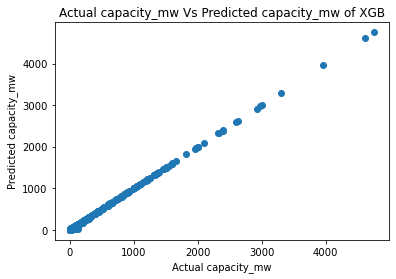

In [158]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(Y_train,Y_xgb_pred)
plt.xlabel('Actual capacity_mw')
plt.ylabel('Predicted capacity_mw')
plt.title('Actual capacity_mw Vs Predicted capacity_mw of XGB')
plt.show()

In [159]:
# Predicting test data with model:
Y_test_xgb_pred = xgb.predict(X_test)

#### Evaluation of XGBRegressor:

In [160]:
xgb_accuracy =r2_score(Y_test,Y_test_xgb_pred)
print("R Square Score of xgb:",xgb_accuracy)

R Square Score of xgb: 0.8236221279535872


In [161]:
print ('mean absolute error of XGB: ',mean_absolute_error(Y_test,Y_test_xgb_pred))

mean absolute error of XGB:  116.81804124222349


In [162]:
print ('mean squared error of  XGB is: ',mean_squared_error(Y_test,Y_test_xgb_pred))

mean squared error of  XGB is:  57099.31546974194


In [163]:
print ('Root mean squared error of XGB is: ',np.sqrt(mean_squared_error(Y_test,Y_test_xgb_pred)))

Root mean squared error of XGB is:  238.95463056769154


#### Scores of XGB:

1.    Accuracy of XGB : 0.8236221279535872
2.    MAE of XGB : 116.81804124222349
3.    MSE of XGB : 57099.31546974194
4.    RMSE of XGB : 238.95463056769154


#### 5. Decision Tree Regressor:    

In [170]:
dt = DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [171]:
#Model Prediction with trained data:
Y_dt_pred = dt.predict(X_train)

In [172]:
print("R Square Score of Decision Tree Regressor: ",r2_score(Y_train,Y_dt_pred))

R Square Score of Decision Tree Regressor:  0.9999284502914347


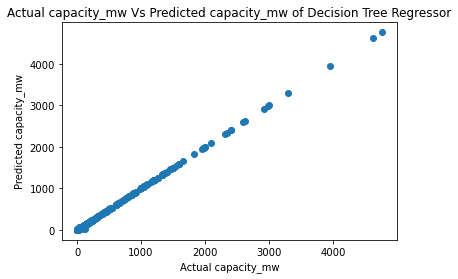

In [173]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(Y_train,Y_dt_pred)
plt.xlabel('Actual capacity_mw')
plt.ylabel('Predicted capacity_mw')
plt.title('Actual capacity_mw Vs Predicted capacity_mw of Decision Tree Regressor')
plt.show()

In [174]:
# Predicting test data with model:
Y_test_dt_pred = dt.predict(X_test)

#### Evaluation of Decision Tree Regressor:

In [175]:
dt_accuracy = r2_score(Y_test,Y_test_dt_pred)
print("R Square Score of Decision Tree Regressor:",dt_accuracy)
print('Accuracy of dt :',dt_accuracy*100)

R Square Score of Decision Tree Regressor: 0.8387944136611535
Accuracy of dt : 83.87944136611534


In [176]:
print ('mean absolute error of Decision Tree Regressor: ',mean_absolute_error(Y_test,Y_test_dt_pred))

mean absolute error of Decision Tree Regressor:  113.94662101188092


In [177]:
print ('mean squared error of Decision Tree Regressor: ',mean_squared_error(Y_test,Y_test_dt_pred))

mean squared error of Decision Tree Regressor:  52187.547808856376


In [178]:
print ('Root mean squared error of Decision Tree Regressor: ',np.sqrt(mean_squared_error(Y_test,Y_test_dt_pred)))

Root mean squared error of Decision Tree Regressor:  228.4459406705586


##### Scores of Decision Tree Regressor:

1.    Accuracy of DT : 0.8387944136611535
2.    MAE of DT : 113.94662101188092
3.    MSE of DT : 52187.547808856376
4.    RMSE of DT : 228.4459406705586



- As we can see Random Forest Regressor has given the best accuracy 86%. Now let's check the cross validation scores as well.

#### Evaluating with Cross Validation:

Cross validation is widely used technique to evaluate the performance of Machine Learning Models. Cross Validation divides the data into parts, where one set is used for traning and other is used for testing purpose. And by applying CV, we can understand if our model is overfitting on training data or not.

In [164]:
kn_cv_score = cross_val_score(kn,X_train,Y_train,cv=5,scoring='r2')
print(kn_cv_score)
print('mean :',kn_cv_score.mean()*100)

[0.7022688  0.83439779 0.85724098 0.87283465 0.80305171]
mean : 81.39587866263118


In [165]:
rfr_cv_score = cross_val_score(rfr,X_train,Y_train,cv=5,scoring='r2')
print(rfr_cv_score)
print('mean :',rfr_cv_score.mean()*100)

[0.7238407  0.87137602 0.89396009 0.88187253 0.83132531]
mean : 84.04749307967909


In [166]:
gbr_cv_score = cross_val_score(gbr,X_train,Y_train,cv=5,scoring='r2')
print(gbr_cv_score)
print('mean :',gbr_cv_score.mean()*100)

[0.71600669 0.80386669 0.90357897 0.85328489 0.81742127]
mean : 81.88317044321275


In [167]:
xgb_cv_score = cross_val_score(xgb,X_train,Y_train,cv=5,scoring='r2')
print(xgb_cv_score)
print('mean :',xgb_cv_score.mean()*100)

[0.71717734 0.79236017 0.89466362 0.84650173 0.80732011]
mean : 81.16045936376392


In [179]:
dt_cv_score = cross_val_score(dt,X_train,Y_train,cv=5,scoring='r2')
print(dt_cv_score)
print('mean :',dt_cv_score.mean()*100)

[0.6066568  0.80323429 0.80480182 0.83492181 0.68017672]
mean : 74.59582880407496


#### Selection of the best model for Global Power Plant project  (capacity_mw):
 Now let's check the difference between Accuracy Scores and Cross Validation Scores of the models to select the best model out of 5 models.
 
- KNN = 76.06-81.39 = -4.58, 
- RFR = 86.66-84.04 = 2.62, 
- GBR = 85.82-81.88= 3.94,
- DT = 83.87-74.59 = 9.28,
- XGB = 82.36-81.16 = 1.2


 ##### Observation:

 Overall the result of all models are between 76% to 86%. As the difference between CV score and accuracy score of XGB is less and it's got the best accuracy, we are going to tune it's parameter to obtain best result.

#### Hyperparameter Tuning:
Now we will use Grid Search Technique to tune the hyperparameter of XGBRegressor. After getting the best parameters we can put those into the model to obtain the best accuracy.

In [186]:
xgbr = xgb.XGBRegressor()
grid_param= {'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective':['reg:squarederror']}

In [187]:
gbr_search=GridSearchCV(xgbr,param_grid=grid_param,scoring='neg_mean_squared_error',n_jobs=1,cv=5)
gbr_search.fit(X_train,Y_train)
gbr_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [188]:
xgbr= xgb.XGBRegressor(learning_rate=0.1,max_depth=7,colsample_bytree=0.7,n_estimators=500) 
xgbr.fit(X_train,Y_train)
Y_pred=xgbr.predict(X_test)

In [190]:
print("*** Accuracy Post Tuning***")
print(r2_score(Y_test,Y_pred)*100)

*** Accuracy Post Tuning***
84.18208086812294


#### Observation:

After hyperparameter tuning with best parameters of XGBoostRegressor is giving the best accuracy of 84%. So, we are going to save XGBoostRegressor Model for capacity_mw prediction.


Let's check the graph after hyperparameter tuning as well.

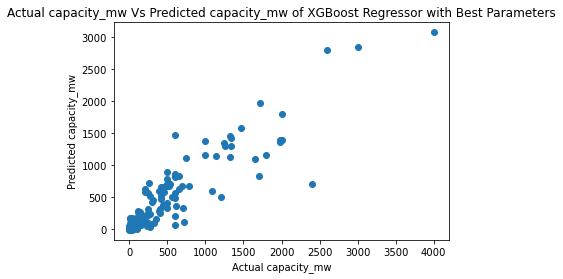

In [191]:
# Checking Actual capacity_mw Vs Predicted capacity_mw using Graph after Hyperparameter tuning:
plt.scatter(Y_test,Y_pred)
plt.xlabel('Actual capacity_mw')
plt.ylabel('Predicted capacity_mw')
plt.title('Actual capacity_mw Vs Predicted capacity_mw of XGBoost Regressor with Best Parameters')
plt.show()

- As the XGBoostingRegressor is giving best accuracy after Hyperparameter tuning, we are going to save this model.

In [193]:
# model prediction using XGBRegressor
X_predict = list(xgbr.predict(X_test))
xgbr_capa = {'predicted_values':X_predict,'orignal_values':Y_test}
print(pd.DataFrame(xgbr_capa))

     predicted_values  orignal_values
301         13.994556           91.80
44         171.946243          180.00
216         -3.062205           10.50
590        328.158539          702.86
446         14.885071            4.50
..                ...             ...
855        229.732635          240.00
459        293.054718          394.00
60         118.163818          720.00
138        163.879318           40.00
405         36.075970           25.00

[227 rows x 2 columns]


In [194]:
#importing joblib
import joblib

joblib.dump(xgbr,'xgbr_capa.obj')

# SAVING THE MODEL

['xgbr_capa.obj']

In [195]:
xgbr_from_joblib=joblib.load('xgbr_capa.obj')
xgbr_from_joblib.predict(X_test)

#TESTING THE SAVED MODEL

array([ 1.39945564e+01,  1.71946243e+02, -3.06220460e+00,  3.28158539e+02,
        1.48850708e+01,  7.18857788e+02,  2.77001762e+01,  4.03746605e+01,
        4.06627998e+01,  1.52432281e+02,  1.41499348e+01,  2.50604782e+02,
        2.77403698e+01,  1.03437738e+01,  1.11931763e+03,  8.11001740e+01,
        8.05748138e+01,  1.65727005e+02,  1.44068012e+01,  7.03018112e+01,
        1.27808895e+01,  1.03287134e+01,  1.14130591e+03,  6.66417847e+02,
        2.21039841e+02,  1.15939049e+02,  5.76089600e+02,  2.52327271e+01,
        1.29739709e+03,  3.21915344e+02,  1.00594948e+02,  6.11479874e+01,
        8.88284149e+01,  1.50233932e+02,  3.21337318e+01,  1.47257898e+03,
       -9.56415844e+00,  9.13059845e+01,  5.15970642e+02,  1.83532364e+02,
        3.59088379e+02,  2.97554016e+01,  2.39268208e+01,  2.52968044e+01,
        1.38798267e+03,  1.79019562e+02,  8.36012573e+02,  2.42195969e+01,
        5.72039223e+01,  7.45676575e+01,  4.62617554e+02,  2.90047340e+01,
        7.12271118e+01,  

#### Conclusion:

The provided dataset contains various informations of 908 Power plants of India. Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type.On basis of available data from  2013 to 2017 and other several variables, models are made to predict the Fuel type and electrical generating capacity in megawatts.
- As we have seen in this dataset the Primary fuel is containing 8 different fuel types, and to make the classification useful and significant we have made it into a binary classification, fuel1 and fuel2. Where fuel1 is containing  Hydro, coal, solar and wind( as the production of these fuels are more ) and fuel2 is containing oil,gas,biomass,nuclear(as the production is less). 
- After analyzing the data we made 5 classification models out of which Random Forest Classifier has given the best accuracy of 91% regarding Fuel type prediction and we have saved that.
- The second prediction according to the problem statement to predict the electrical generating capacity in megawatts. And as the electrical generating capacity is a continuous data we have made 5 different Regression models. Out of which XGBoosting Regressor has given the best accuracy of 84%.